In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
rc('font', family='AppleGothic')
pd.set_option('display.max_rows', None)

file_path = './data_es/data_edu.csv'
data = pd.read_csv(file_path)

# Overview 

In [3]:
year_counts = data["연도"].value_counts()
print(year_counts)

연도
2022    2401
2021    2398
2023    2365
2024    2273
Name: count, dtype: int64


In [4]:

route_counts = data["모집구분"].value_counts()
print(route_counts)

# pass_couts = data["전형"].value_counts()
# print(pass_couts)

모집구분
수시    5938
정시    3431
추가      68
Name: count, dtype: int64


In [2]:
# "연도"에 따라 데이터 분리
data_2021 = data[data["연도"] == 2021]
data_2022 = data[data["연도"] == 2022]
data_2023 = data[data["연도"] == 2023]
data_2024 = data[data["연도"] == 2024]



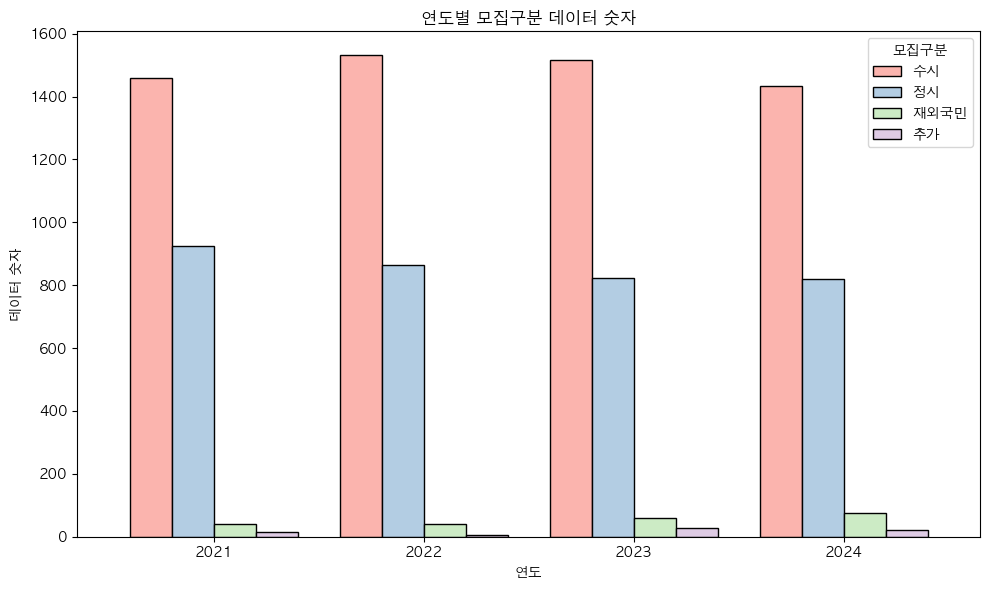

      2021  2022  2023  2024
모집구분                        
수시    1458  1531  1516  1433
정시     925   865   822   819
재외국민    41    39    61    76
추가      15     5    27    21


In [4]:
# "모집구분" 데이터의 연도별 카운트
recruitment_counts = {
    "2021": data_2021["모집구분"].value_counts(),
    "2022": data_2022["모집구분"].value_counts(),
    "2023": data_2023["모집구분"].value_counts(),
    "2024": data_2024["모집구분"].value_counts(),
}

# DataFrame으로 정리
recruitment_df = pd.DataFrame(recruitment_counts).fillna(0).astype(int)

# 파스텔톤 컬러맵 설정
colors = cm.Pastel1.colors

# 그래프 그리기
recruitment_df.T.plot(
    kind='bar',
    figsize=(10, 6),
    edgecolor='black',
    color=colors,
    width=0.8
)
plt.title("연도별 모집구분 데이터 숫자")
plt.xlabel("연도")
plt.ylabel("데이터 숫자")
plt.xticks(rotation=0)
plt.legend(title="모집구분")
plt.tight_layout()
plt.show()
# 표로 데이터 출력
print(recruitment_df)

output_path = './data_es/res.csv'
recruitment_df.to_csv(output_path, encoding='utf-8-sig')

In [5]:
# "모집구분" 데이터의 연도별 카운트
admission_counts = {
    "2021": data_2021["전형"].value_counts(),
    "2022": data_2022["전형"].value_counts(),
    "2023": data_2023["전형"].value_counts(),
    "2024": data_2024["전형"].value_counts(),
}

# DataFrame으로 정리
admission_df = pd.DataFrame(admission_counts).fillna(0).astype(int)

# 결과를 'data_es' 하위 폴더에 'res.csv'로 저장
output_path = './data_es/res.csv'
import os

# 디렉토리가 없으면 생성
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# CSV 저장
admission_df.to_csv(output_path, encoding='utf-8-sig')

output_path

'./data_es/res.csv'

In [39]:
from scipy.stats import ttest_ind

# 2021년 데이터를 분석하는 함수 작성 및 실행
def analyze(data_org):
    # 모집구분별 평균 및 표준편차 계산
    data_filtered = data_org
    group_scores = data_filtered.groupby("모집구분")["총성적평점"]
    summary_stats = group_scores.agg(["mean", "std"]).reset_index()
    summary_stats.columns = ["모집구분", "평균", "표준편차"]
    summary_stats.insert(0, "연도", 2021)

    # 모집구분 간 집단 차이 (t-test)
    results = []
    groups = list(group_scores.groups.keys())
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            group1 = group_scores.get_group(groups[i])
            group2 = group_scores.get_group(groups[j])
            group1_filtered = group1.copy().dropna()
            group2_filtered = group1.copy().dropna()
            t_stat, p_value = ttest_ind(group1_filtered, group2_filtered, equal_var=False)
            results.append({
                "그룹1": groups[i],
                "그룹2": groups[j],
                "t값": t_stat,
                "p값": p_value
            })
    
    ttest_results = pd.DataFrame(results)
    return summary_stats, ttest_results

# 분석 실행
summary_stats_2021, ttest_results_2021 = analyze(data_2021)

# 결과 표시
summary_stats_2021, ttest_results_2021

(     연도  모집구분        평균      표준편차
 0  2021    수시  3.664301  0.574700
 1  2021  재외국민  3.367317  0.788546
 2  2021    정시  3.452971  0.880294
 3  2021    추가  3.165333  1.424740,
     그룹1   그룹2   t값   p값
 0    수시  재외국민  0.0  1.0
 1    수시    정시  0.0  1.0
 2    수시    추가  0.0  1.0
 3  재외국민    정시  0.0  1.0
 4  재외국민    추가  0.0  1.0
 5    정시    추가  0.0  1.0)

In [44]:
from scipy.stats import ttest_ind

stat_data = data_2021.copy()
group_jungsi = stat_data[stat_data["모집구분"] == "정시"]["총성적평점"]
group_susi = stat_data[stat_data["모집구분"] == "수시"]["총성적평점"]
group_jungsi = group_jungsi.dropna()
group_susi = group_susi.dropna()
avg_value_jungsi = group_jungsi.mean()
std_value_jungsi = group_jungsi.std()
avg_value_susi = group_susi.mean()
std_value_susi = group_susi.std()
t_stat, p_value = ttest_ind(group_jungsi, group_susi, equal_var=False)
print(f"평균: {avg_value_jungsi:.3f}", f"std: {std_value_jungsi:.3f}")
print(f"평균: {avg_value_susi:.3f}", f"std: {std_value_susi:.3f}")
print(f"t값: {t_stat:.3f}, p값: {p_value}")

stat_data = data_2022.copy()
group_jungsi = stat_data[stat_data["모집구분"] == "정시"]["총성적평점"]
group_susi = stat_data[stat_data["모집구분"] == "수시"]["총성적평점"]
group_jungsi = group_jungsi.dropna()
group_susi = group_susi.dropna()
avg_value_jungsi = group_jungsi.mean()
std_value_jungsi = group_jungsi.std()
avg_value_susi = group_susi.mean()
std_value_susi = group_susi.std()
t_stat, p_value = ttest_ind(group_jungsi, group_susi, equal_var=False)
print(f"평균: {avg_value_jungsi:.3f}", f"std: {std_value_jungsi:.3f}")
print(f"평균: {avg_value_susi:.3f}", f"std: {std_value_susi:.3f}")
print(f"t값: {t_stat:.3f}, p값: {p_value}")

stat_data = data_2023.copy()
group_jungsi = stat_data[stat_data["모집구분"] == "정시"]["총성적평점"]
group_susi = stat_data[stat_data["모집구분"] == "수시"]["총성적평점"]
group_jungsi = group_jungsi.dropna()
group_susi = group_susi.dropna()
avg_value_jungsi = group_jungsi.mean()
std_value_jungsi = group_jungsi.std()
avg_value_susi = group_susi.mean()
std_value_susi = group_susi.std()
t_stat, p_value = ttest_ind(group_jungsi, group_susi, equal_var=False)
print(f"평균: {avg_value_jungsi:.3f}", f"std: {std_value_jungsi:.3f}")
print(f"평균: {avg_value_susi:.3f}", f"std: {std_value_susi:.3f}")
print(f"t값: {t_stat:.3f}, p값: {p_value}")

stat_data = data_2024.copy()
group_jungsi = stat_data[stat_data["모집구분"] == "정시"]["총성적평점"]
group_susi = stat_data[stat_data["모집구분"] == "수시"]["총성적평점"]
group_jungsi = group_jungsi.dropna()
group_susi = group_susi.dropna()
avg_value_jungsi = group_jungsi.mean()
std_value_jungsi = group_jungsi.std()
avg_value_susi = group_susi.mean()
std_value_susi = group_susi.std()
t_stat, p_value = ttest_ind(group_jungsi, group_susi, equal_var=False)
print(f"평균: {avg_value_jungsi:.3f}", f"std: {std_value_jungsi:.3f}")
print(f"평균: {avg_value_susi:.3f}", f"std: {std_value_susi:.3f}")
print(f"t값: {t_stat:.3f}, p값: {p_value}")




평균: 3.453 std: 0.880
평균: 3.664 std: 0.575
t값: -6.459, p값: 1.4459199989786233e-10
평균: 3.304 std: 0.931
평균: 3.503 std: 0.613
t값: -5.616, p값: 2.3942331612789248e-08
평균: 3.231 std: 0.985
평균: 3.446 std: 0.627
t값: -5.618, p값: 2.4118312060309852e-08
평균: 3.206 std: 1.064
평균: 3.423 std: 0.801
t값: -5.058, p값: 4.827125050203227e-07


In [6]:
import pandas as pd
from scipy.stats import ttest_ind

# 결과 저장 리스트
results = []

# 연도별 데이터 분석
for year, stat_data in [("2021", data_2021), ("2022", data_2022), ("2023", data_2023), ("2024", data_2024)]:
    # 정시와 수시 데이터 필터링
    group_jungsi = stat_data[stat_data["모집구분"] == "정시"]["총성적평점"].dropna()
    group_susi = stat_data[stat_data["모집구분"] == "수시"]["총성적평점"].dropna()

    # 평균 및 표준편차 계산
    avg_value_jungsi = group_jungsi.mean()
    std_value_jungsi = group_jungsi.std()
    avg_value_susi = group_susi.mean()
    std_value_susi = group_susi.std()

    # t-test 계산
    t_stat, p_value = ttest_ind(group_jungsi, group_susi, equal_var=False)

    # 결과 저장
    results.append({
        "연도": year,
        "모집구분": "정시",
        "평균(표준편차)": f"{avg_value_jungsi:.3f}({std_value_jungsi:.3f})",
        "t값": f"{t_stat:.3f}",
        "p값": f"{p_value:.3e}"
    })
    results.append({
        "연도": year,
        "모집구분": "수시",
        "평균(표준편차)": f"{avg_value_susi:.3f}({std_value_susi:.3f})",
        "t값": f"{t_stat:.3f}",
        "p값": f"{p_value:.3e}"
    })

# DataFrame으로 변환
results_df = pd.DataFrame(results)

# CSV 파일로 저장
output_path = './data_es/res.csv'
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

/var/folders/bl/rfn7vb_d1ll48pvkyzmzrtxm0000gn/T/ipykernel_9901/318124416.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(jungsi_scores,
/var/folders/bl/rfn7vb_d1ll48pvkyzmzrtxm0000gn/T/ipykernel_9901/318124416.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(susi_scores,


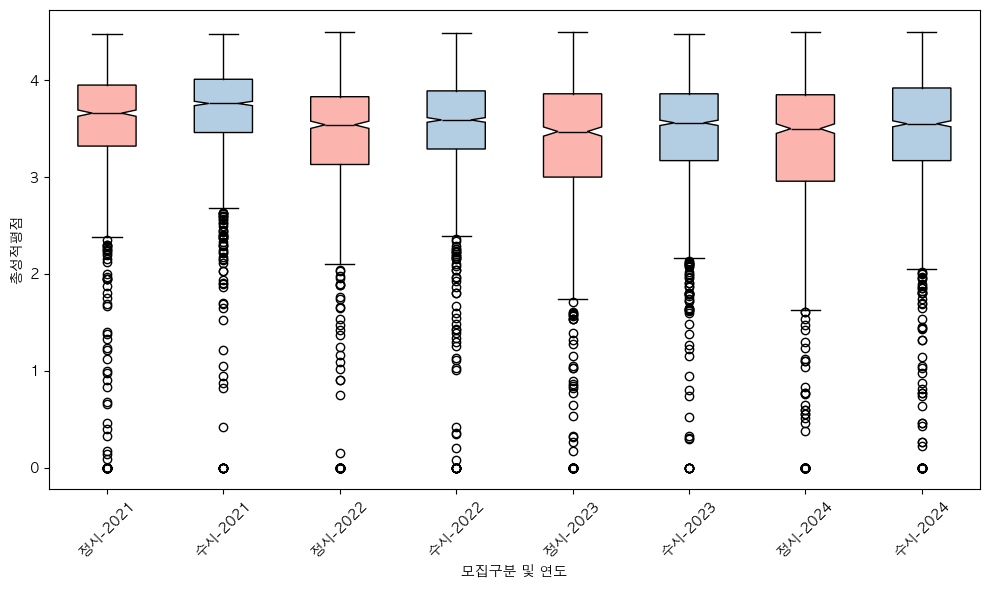

In [47]:
# 코드 실행 환경이 초기화되었습니다. 필요한 라이브러리와 데이터 다시 로드

# 라이브러리 재로드
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = './data_es/data_edu.csv'
data = pd.read_csv(file_path)

# 연도별 데이터 분리
data_2021 = data[data["연도"] == 2021]
data_2022 = data[data["연도"] == 2022]
data_2023 = data[data["연도"] == 2023]
data_2024 = data[data["연도"] == 2024]

# 연도별 "정시"와 "수시" 성적 데이터 모으기
years = [2021, 2022, 2023, 2024]
jungsi_scores = [
    data_2021[data_2021["모집구분"] == "정시"]["총성적평점"].dropna(),
    data_2022[data_2022["모집구분"] == "정시"]["총성적평점"].dropna(),
    data_2023[data_2023["모집구분"] == "정시"]["총성적평점"].dropna(),
    data_2024[data_2024["모집구분"] == "정시"]["총성적평점"].dropna()
]
susi_scores = [
    data_2021[data_2021["모집구분"] == "수시"]["총성적평점"].dropna(),
    data_2022[data_2022["모집구분"] == "수시"]["총성적평점"].dropna(),
    data_2023[data_2023["모집구분"] == "수시"]["총성적평점"].dropna(),
    data_2024[data_2024["모집구분"] == "수시"]["총성적평점"].dropna()
]

colors = cm.Pastel1.colors

# Box plot 그리기
plt.figure(figsize=(10, 6))

# 정시와 수시 데이터를 개별적으로 Box plot 생성
plt.boxplot(jungsi_scores, 
            positions=[i * 2 for i in range(len(years))], 
            labels=[f"정시-{year}" for year in years], 
            patch_artist=True, notch=True, 
            boxprops=dict(facecolor=colors[0], color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black'))

plt.boxplot(susi_scores, 
            positions=[i * 2 + 1 for i in range(len(years))], 
            labels=[f"수시-{year}" for year in years], 
            patch_artist=True, notch=True, 
            boxprops=dict(facecolor=colors[1], color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black'))

# 그래프 설정
plt.xlabel("모집구분 및 연도")
plt.ylabel("총성적평점")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/bl/rfn7vb_d1ll48pvkyzmzrtxm0000gn/T/ipykernel_82796/4118474046.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(jungsi_scores,
/var/folders/bl/rfn7vb_d1ll48pvkyzmzrtxm0000gn/T/ipykernel_82796/4118474046.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(susi_scores,


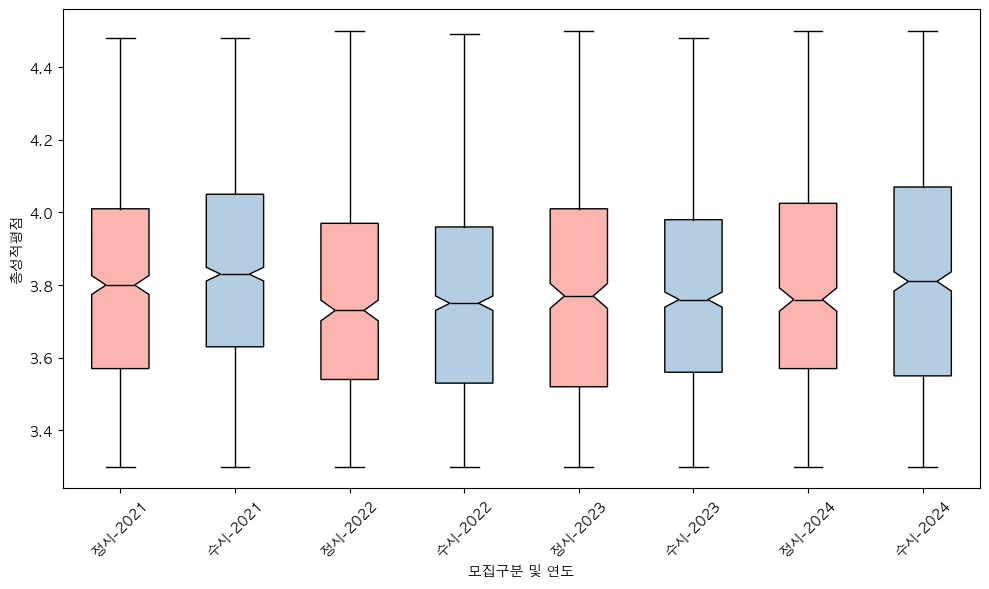

In [8]:
# 코드 실행 환경이 초기화되었습니다. 필요한 라이브러리와 데이터 다시 로드

# 라이브러리 재로드
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = './data_es/data_edu.csv'
data = pd.read_csv(file_path)

# 연도별 데이터 분리
data_2021 = data[data["연도"] == 2021]
data_2022 = data[data["연도"] == 2022]
data_2023 = data[data["연도"] == 2023]
data_2024 = data[data["연도"] == 2024]

# 연도별 "정시"와 "수시" 성적 데이터 모으기
years = [2021, 2022, 2023, 2024]
# 총성적평점이 3.3 이상인 경우만 필터링
jungsi_scores = [
    data_2021[(data_2021["모집구분"] == "정시") & (data_2021["총성적평점"] >= 3.3)]["총성적평점"].dropna(),
    data_2022[(data_2022["모집구분"] == "정시") & (data_2022["총성적평점"] >= 3.3)]["총성적평점"].dropna(),
    data_2023[(data_2023["모집구분"] == "정시") & (data_2023["총성적평점"] >= 3.3)]["총성적평점"].dropna(),
    data_2024[(data_2024["모집구분"] == "정시") & (data_2024["총성적평점"] >= 3.3)]["총성적평점"].dropna()
]
susi_scores = [
    data_2021[(data_2021["모집구분"] == "수시") & (data_2021["총성적평점"] >= 3.3)]["총성적평점"].dropna(),
    data_2022[(data_2022["모집구분"] == "수시") & (data_2022["총성적평점"] >= 3.3)]["총성적평점"].dropna(),
    data_2023[(data_2023["모집구분"] == "수시") & (data_2023["총성적평점"] >= 3.3)]["총성적평점"].dropna(),
    data_2024[(data_2024["모집구분"] == "수시") & (data_2024["총성적평점"] >= 3.3)]["총성적평점"].dropna()
]

colors = cm.Pastel1.colors

# Box plot 그리기
plt.figure(figsize=(10, 6))

# 정시와 수시 데이터를 개별적으로 Box plot 생성
plt.boxplot(jungsi_scores, 
            positions=[i * 2 for i in range(len(years))], 
            labels=[f"정시-{year}" for year in years], 
            patch_artist=True, notch=True, 
            boxprops=dict(facecolor=colors[0], color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black'))

plt.boxplot(susi_scores, 
            positions=[i * 2 + 1 for i in range(len(years))], 
            labels=[f"수시-{year}" for year in years], 
            patch_artist=True, notch=True, 
            boxprops=dict(facecolor=colors[1], color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black'))

# 그래프 설정
plt.xlabel("모집구분 및 연도")
plt.ylabel("총성적평점")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 결과 저장 리스트
results = []

# 연도별 데이터 분석
for year, stat_data in [("2021", data_2021), ("2022", data_2022), ("2023", data_2023), ("2024", data_2024)]:
    # 정시와 수시 데이터 필터링
    group_jungsi = stat_data[(stat_data["모집구분"] == "정시") & (stat_data["총성적평점"] >= 3.3)]["총성적평점"].dropna()
    group_susi = stat_data[(stat_data["모집구분"] == "수시") & (stat_data["총성적평점"] >= 3.3)]["총성적평점"].dropna()

    # 평균 및 표준편차 계산
    avg_value_jungsi = group_jungsi.mean()
    std_value_jungsi = group_jungsi.std()
    avg_value_susi = group_susi.mean()
    std_value_susi = group_susi.std()

    # t-test 계산
    t_stat, p_value = ttest_ind(group_jungsi, group_susi, equal_var=False)

    # 결과 저장
    results.append({
        "연도": year,
        "모집구분": "정시",
        "평균(표준편차)": f"{avg_value_jungsi:.3f}({std_value_jungsi:.3f})",
        "t값": f"{t_stat:.3f}",
        "p값": f"{p_value:.3e}"
    })
    results.append({
        "연도": year,
        "모집구분": "수시",
        "평균(표준편차)": f"{avg_value_susi:.3f}({std_value_susi:.3f})",
        "t값": f"{t_stat:.3f}",
        "p값": f"{p_value:.3e}"
    })

# DataFrame으로 변환
results_df = pd.DataFrame(results)

# CSV 파일로 저장
output_path = './data_es/res.csv'
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

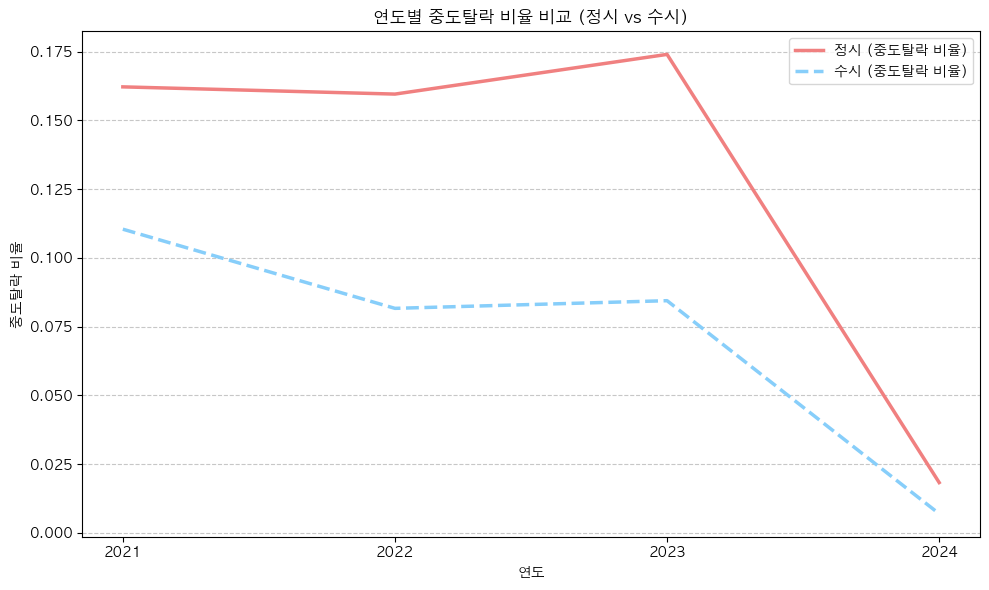

In [11]:
# "중도탈락여부" 항목에서 연도별 "Y" 비율 계산
def calculate_dropout_ratio(data, category):
    return data[data["모집구분"] == category].groupby("연도")["중도탈락여부"].apply(lambda x: (x == "Y").mean())

# 정시와 수시의 연도별 "Y" 비율 계산
jungsi_dropout_ratio = calculate_dropout_ratio(data, "정시")
susi_dropout_ratio = calculate_dropout_ratio(data, "수시")

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 정시 꺾은선 그래프 (붉은색 계통 파스텔 색 실선)
plt.plot(jungsi_dropout_ratio.index, jungsi_dropout_ratio.values, linestyle='-', linewidth=2.5, 
         color='lightcoral', label='정시 (중도탈락 비율)')

# 수시 꺾은선 그래프 (파란색 계통 파스텔 색 점선)
plt.plot(susi_dropout_ratio.index, susi_dropout_ratio.values, linestyle='--', linewidth=2.5, 
         color='lightskyblue', label='수시 (중도탈락 비율)')

# 그래프 설정
plt.title("연도별 중도탈락 비율 비교 (정시 vs 수시)")
plt.xlabel("연도")
plt.ylabel("중도탈락 비율")
plt.xticks(jungsi_dropout_ratio.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=[2021, 2022, 2023, 2024], labels=["2021", "2022", "2023", "2024"])
plt.tight_layout()
plt.show()

import pandas as pd
from scipy.stats import chi2_contingency

# "중도탈락여부" 항목에서 "정시"와 "수시"의 중도탈락 데이터 계산
def calculate_dropout_stats(data, category):
    total = data[data["모집구분"] == category].groupby("연도")["중도탈락여부"].count()
    dropout = data[data["모집구분"] == category].groupby("연도")["중도탈락여부"].apply(lambda x: (x == "Y").sum())
    ratio = dropout / total
    return dropout, ratio

# 정시와 수시의 데이터 계산
jungsi_dropout, jungsi_ratio = calculate_dropout_stats(data, "정시")
susi_dropout, susi_ratio = calculate_dropout_stats(data, "수시")

# 카이제곱 검정을 통한 집단 간 차이 계산
contingency_table = pd.DataFrame({
    "정시_Y": jungsi_dropout,
    "정시_N": jungsi_dropout.index.map(lambda x: data[(data["연도"] == x) & (data["모집구분"] == "정시")]["중도탈락여부"].count() - jungsi_dropout[x]),
    "수시_Y": susi_dropout,
    "수시_N": susi_dropout.index.map(lambda x: data[(data["연도"] == x) & (data["모집구분"] == "수시")]["중도탈락여부"].count() - susi_dropout[x])
})

chi2, p, dof, _ = chi2_contingency(contingency_table.T.values)

# 결과 저장
results = [
    {
        "모집구분": "정시",
        "중도탈락 인원(비율)": f"{jungsi_dropout.sum()}({jungsi_ratio.mean():.3f})",
        "집단 간 차이": f"카이제곱={chi2:.3f}, df={dof}, p={p:.3e}"
    },
    {
        "모집구분": "수시",
        "중도탈락 인원(비율)": f"{susi_dropout.sum()}({susi_ratio.mean():.3f})",
        "집단 간 차이": f"카이제곱={chi2:.3f}, df={dof}, p={p:.3e}"
    }
]

# DataFrame으로 변환
results_df = pd.DataFrame(results)

# CSV 파일로 저장
output_path = './res.csv'
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

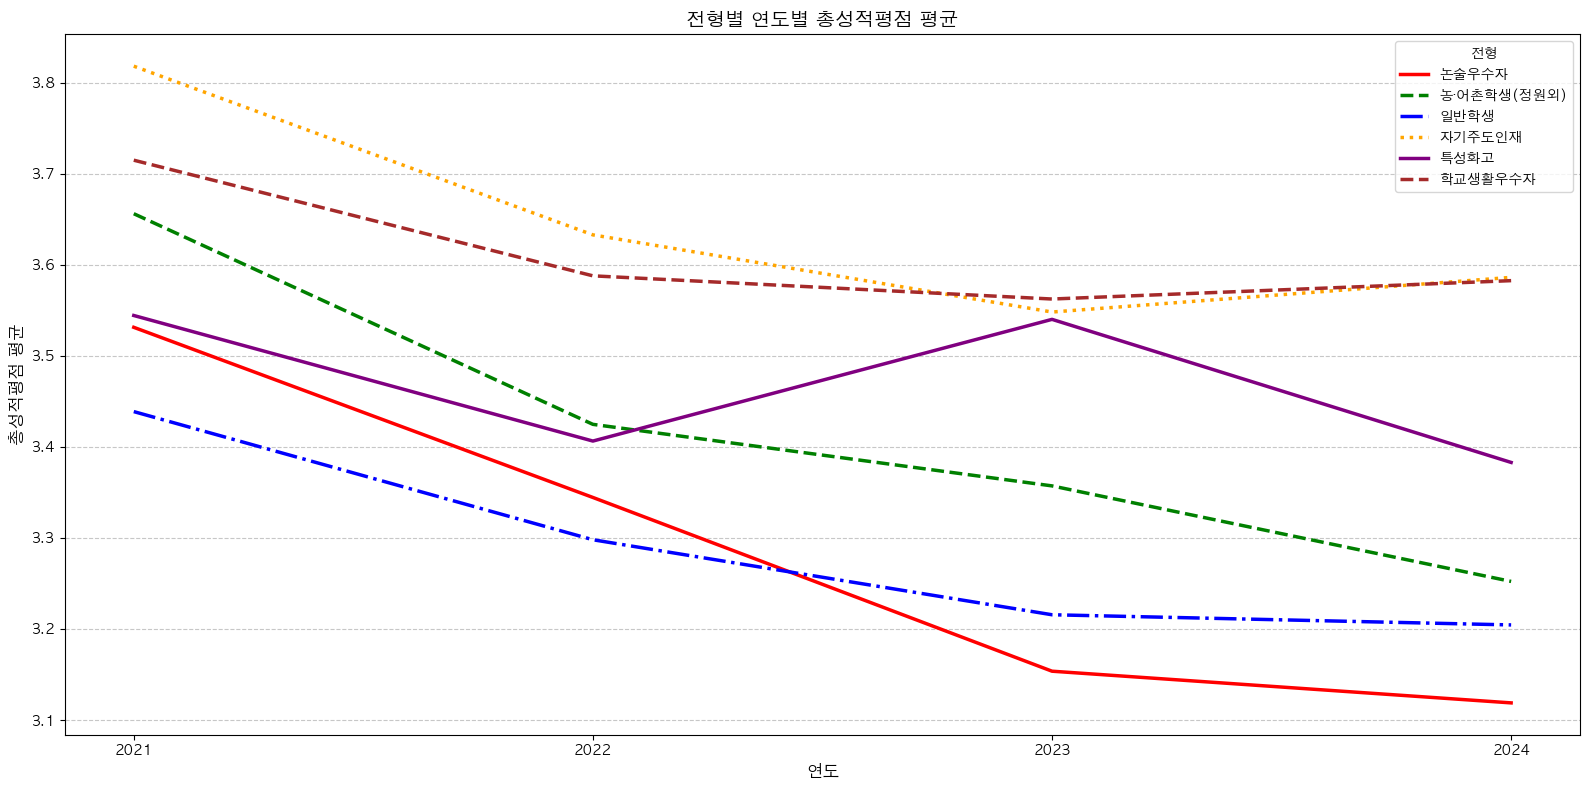

In [14]:
# "전형" 데이터를 새로운 카테고리로 정리
data["전형"] = data["전형"].replace(
    ["특성화고 등을 졸업한 재직자(정원외)", "특성화고교출신자(정원외)", "특성화고등을졸업한재직자(정원외)"], 
    "특성화고"
)

# "전형"별로 연도별 총성적학점 평균 계산
categories = ["논술우수자", "농·어촌학생(정원외)", "일반학생", "자기주도인재", "특성화고", "학교생활우수자"]
average_scores = {}

for category in categories:
    average_scores[category] = data[data["전형"] == category].groupby("연도")["총성적평점"].mean()

# 그래프 그리기
plt.figure(figsize=(16, 8))

# 카테고리별 색상과 스타일 지정
styles = {
    "논술우수자": ("red", "-"),
    "농·어촌학생(정원외)": ("green", "--"),
    "일반학생": ("blue", "-."),
    "자기주도인재": ("orange", ":"),
    "특성화고": ("purple", "-"),
    "학교생활우수자": ("brown", "--")
}

# 각 카테고리에 대해 꺾은선 그래프 추가
for category, (color, linestyle) in styles.items():
    plt.plot(average_scores[category].index, average_scores[category].values, 
             label=category, color=color, linestyle=linestyle, linewidth=2.5)

# 그래프 설정
plt.title("전형별 연도별 총성적평점 평균", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("총성적평점 평균", fontsize=12)
plt.legend(title="전형", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(ticks=[2021, 2022, 2023, 2024], labels=["2021", "2022", "2023", "2024"])
plt.tight_layout()
plt.show()

import pandas as pd
from scipy.stats import chi2_contingency

# "전형" 데이터를 새로운 카테고리로 정리
data["전형"] = data["전형"].replace(
    ["특성화고 등을 졸업한 재직자(정원외)", "특성화고교출신자(정원외)", "특성화고등을졸업한재직자(정원외)"], 
    "특성화고"
)

# "전형"별로 탈락/비탈락 데이터를 요약
categories = ["논술우수자", "농·어촌학생(정원외)", "일반학생", "자기주도인재", "특성화고", "학교생활우수자"]
contingency_table = []

for category in categories:
    total = data[data["전형"] == category]["중도탈락여부"].count()
    dropout = data[data["전형"] == category]["중도탈락여부"].apply(lambda x: x == "Y").sum()
    contingency_table.append([dropout, total - dropout])

# 교차표를 DataFrame으로 변환
contingency_df = pd.DataFrame(contingency_table, index=categories, columns=["탈락", "비탈락"])

# 카이제곱 검정 수행
chi2, p, dof, _ = chi2_contingency(contingency_df)

# 결과 저장
results = []
for i, category in enumerate(categories):
    dropout, non_dropout = contingency_table[i]
    ratio = dropout / (dropout + non_dropout) if (dropout + non_dropout) > 0 else 0
    results.append({
        "전형": category,
        "중도탈락 인원(비율)": f"{dropout}({ratio:.3f})",
        "집단 간 차이": f"카이제곱={chi2:.3f}, df={dof}, p={p:.3e}"
    })

# DataFrame으로 변환
results_df = pd.DataFrame(results)

# CSV 파일로 저장
output_path = './res.csv'
results_df.to_csv(output_path, index=False, encoding='utf-8-sig')

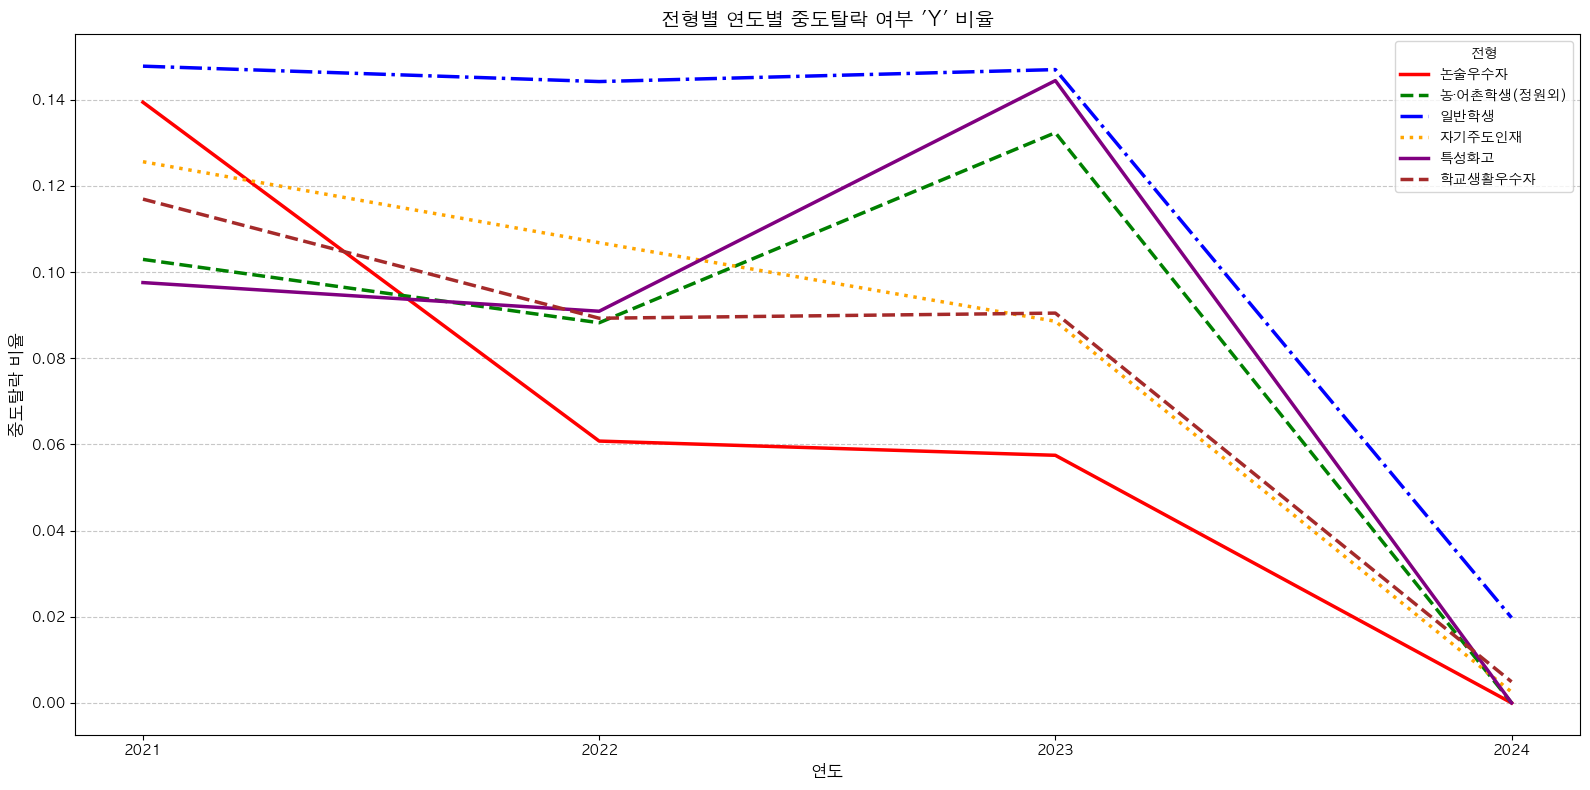

In [56]:
# "전형" 데이터를 새로운 카테고리로 정리
data["전형"] = data["전형"].replace(
    ["특성화고 등을 졸업한 재직자(정원외)", "특성화고교출신자(정원외)", "특성화고등을졸업한재직자(정원외)"], 
    "특성화고"
)

# "전형"별로 연도별 중도탈락 여부 "Y" 비율 계산
categories = ["논술우수자", "농·어촌학생(정원외)", "일반학생", "자기주도인재", "특성화고", "학교생활우수자"]
dropout_ratios = {}

for category in categories:
    dropout_ratios[category] = data[data["전형"] == category].groupby("연도")["중도탈락여부"].apply(lambda x: (x == "Y").mean())

# 그래프 그리기
plt.figure(figsize=(16, 8))

# 카테고리별 색상과 스타일 지정
styles = {
    "논술우수자": ("red", "-"),
    "농·어촌학생(정원외)": ("green", "--"),
    "일반학생": ("blue", "-."),
    "자기주도인재": ("orange", ":"),
    "특성화고": ("purple", "-"),
    "학교생활우수자": ("brown", "--")
}

# 각 카테고리에 대해 꺾은선 그래프 추가
for category, (color, linestyle) in styles.items():
    plt.plot(dropout_ratios[category].index, dropout_ratios[category].values, 
             label=category, color=color, linestyle=linestyle, linewidth=2.5)

# 그래프 설정
plt.title("전형별 연도별 중도탈락 여부 'Y' 비율", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("중도탈락 비율", fontsize=12)
plt.legend(title="전형", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(ticks=[2021, 2022, 2023, 2024], labels=["2021", "2022", "2023", "2024"])
plt.tight_layout()
plt.show()